In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta

In [2]:
df = pd.read_csv('./processed_data.csv')
df

Date          Open          High           Low         Close  \
0     2016-07-21   1631.666626   1631.666626   1593.333374   1605.000000   
1     2016-07-22   1608.333374   1628.333374   1603.333374   1603.333374   
2     2016-07-25   1633.333374   1635.000000   1600.000000   1600.000000   
3     2016-07-26   1631.666626   1665.000000   1616.666626   1663.333374   
4     2016-07-27   1670.000000   1710.000000   1670.000000   1706.666626   
...          ...           ...           ...           ...           ...   
1494  2022-08-03  12170.000000  12170.000000  11840.000000  12050.000000   
1495  2022-08-04  12250.000000  12640.000000  12100.000000  12540.000000   
1496  2022-08-05  12650.000000  12780.000000  12350.000000  12500.000000   
1497  2022-08-08  12350.000000  12470.000000  12060.000000  12320.000000   
1498  2022-08-09  12380.000000  12740.000000  12320.000000  12690.000000   

         Adj Close  Volume  AO_5_34  APO_12_26  BIAS_SMA_26  ...  \
0      1454.140381   25800       -1         -1           -1  ...   
1      1452.630615   11700       -1         -1           -1  ...   
2      1449.610474   22200       -1         -1           -1  ...   
3      1506.990845   32700        1         -1           -1  ...   
4      1546.251099   30900        1          1            1  ...   
...            ...     ...      ...        ...          ...  ...   
1494  12050.000000   96700        1          1            1  ...   
1495  12540.000000   89200        1          1            1  ...   
1496  12500.000000   86000        1          1            1  ...   
1497  12320.000000  122900        1          1            1  ...   
1498  12690.000000   91200        1         -1            1  ...   

      STOCHk_14_3_3  STOCHd_14_3_3  STOCHRSIk_14_14_3_3  STOCHRSId_14_14_3_3  \
0                -1             -1                   -1                   -1   
1                 1             -1                    0                   -1   
2                -1             -1                   -1                   -1   
3                 1              1                    1                    1   
4                 1              1                    1                    1   
...             ...            ...                  ...                  ...   
1494              1              1                    1                    1   
1495              1              1                    1                    1   
1496              1              1                    1                    1   
1497             -1             -1                   -1                   -1   
1498              1             -1                    0                   -1   

      TRIX_30_9  TRIXs_30_9  TSI_13_25_13  TSIs_13_25_13  UO_7_14_28  WILLR_14  
0             1           1            -1             -1          -1        -1  
1             1           1            -1             -1          -1        -1  
2             1           1            -1             -1          -1        -1  
3             1           1             1             -1           1         1  
4             1           1             1              1           1         1  
...         ...         ...           ...            ...         ...       ...  
1494         -1          -1             1              1           1         1  
1495         -1          -1             1              1           1         1  
1496          1          -1             1              1          -1        -1  
1497          1          -1             1              1           1        -1  
1498          1          -1             1              1           1         1  

[1499 rows x 78 columns]

In [3]:
def makePairedFeatures(df):
    cols = df.columns
    for i in range(7, len(cols)):
        for j in range(i+1, len(cols)):
            df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
    cols = df.columns
    for i in range(7, len(cols)):
        df["-"+cols[i]] = -df[cols[i]]
    
    return df.copy()
# makePairedFeatures(df)

In [4]:
def splitData(arr):
    train_count = len(arr) - 500
    val_count = 450
    return arr[:train_count], arr[train_count:train_count+val_count], arr[train_count+val_count:]

In [5]:
# df, df_val, df_test = splitData(df)
paired_df = makePairedFeatures(df)

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

In [19]:
def getBestColumns(df, horizon = 1):
    price = df["Adj Close"]
    perf = []
    for col in df.columns[7:]:
        window = 60
        good, total = 0, window
        pos, neg = 0, 0
        for i in range(0, window):
            if df[col][i] == 1 and price[i] <= price[i+horizon]:
                good +=1
            elif df[col][i] == -1 and price[i] >= price[i+horizon]:
                good +=1
            
            if df[col][i] > 0:
                pos += 1
            else:
                neg += 1 

        acc = good/total
        bias = abs(pos - neg)
        for i in range(window, len(df)-horizon):
            if df[col][i] == 1 and price[i] <= price[i+horizon]:
                good +=1
            elif df[col][i] == -1 and price[i] >= price[i+horizon]:
                good +=1
                
            if df[col][i] > 0:
                pos += 1
            else:
                neg += 1
            
            last = i - window
            if df[col][last] == 1 and price[last] <= price[last+horizon]:
                good -=1
            elif df[col][last] == -1 and price[last] >= price[last+horizon]:
                good -=1
                    
            if df[col][last] > 0:
                pos -= 1
            else:
                neg -= 1
            
            priceDelta = price[i+horizon] / price[last+horizon]
            bias = max(abs(pos - neg), bias)
            acc = min(acc, good/total)
        if acc > 0.4:
            print(col, bias, acc)
        perf.append((acc, col))

    perf = sorted(perf, reverse=True)
    print(perf)
    best_cols = [colName for score, colName in perf]
    best_cols = best_cols[:min(50,len(best_cols))]
    return best_cols

# Filter out best columns based on training data
best_cols = getBestColumns(paired_df)
print(best_cols, len(best_cols))

APO_12_26+CCI_14_0.015 24 0.4166666666666667
APO_12_26+BULLP_13 20 0.4166666666666667
APO_12_26+J_9_3 18 0.4166666666666667
APO_12_26+PVOs_12_26_9 44 0.43333333333333335
BIAS_SMA_26+DMP_14 38 0.4166666666666667
BIAS_SMA_26+J_9_3 22 0.4166666666666667
AR_26+TRIX_30_9 16 0.4166666666666667
AR_26+TRIXs_30_9 18 0.4166666666666667
BR_26+FISHERT_9_1 28 0.4166666666666667
BR_26+KSTs_9 24 0.4166666666666667
BR_26+RVGIs_14_4 24 0.4166666666666667
BR_26+SMIs_5_20_5 20 0.43333333333333335
CCI_14_0.015+FISHERT_9_1 26 0.4166666666666667
CCI_14_0.015+FISHERTs_9_1 30 0.43333333333333335
CCI_14_0.015+KSTs_9 30 0.4166666666666667
CTI_12+SQZ_ON 60 0.4166666666666667
CTI_12+SQZPRO_ON_NORMAL 60 0.4166666666666667
CTI_12+SQZPRO_ON_NARROW 60 0.4166666666666667
DMP_14+PPOh_12_26_9 24 0.4166666666666667
DMP_14+PPOs_12_26_9 24 0.4166666666666667
DMP_14+SMI_5_20_5 38 0.4166666666666667
DMP_14+SMIs_5_20_5 38 0.4166666666666667
DMN_14+SQZPRO_ON_WIDE 36 0.4166666666666667
DMN_14+TRIXs_30_9 44 0.4166666666666667
ER

In [20]:
def colNamesToArr(colNames, df):
    return np.array([df[col].to_numpy() for col in colNames]).T

import itertools
def scoreCombinations(df, colNames, horizon = 1):
    print("Cols", len(colNames))
    arr, prices = colNamesToArr(colNames, df), df["Adj Close"].to_numpy()
    mask = np.zeros(len(colNames), dtype=np.int32)
    true = []

    for i in range(len(prices)-horizon):
        if prices[i] < prices[i+horizon]:
            true.append(1)
        else:
            true.append(-1)

    true = np.array(true)
#     print(arr.shape)
    slicedArr = arr[:len(true),:]
    bestScore = 0
    bestSubset = np.copy(mask)
    bestBySize = {}
#     print(true.shape)
    for size in [1, 3]:
        for combo in itertools.combinations(range(len(colNames)), size):
            mask = np.zeros(len(colNames))
            mask[list(combo)]=1
#             print(mask)
            prod = slicedArr @ mask
#             print(prod)
            prod = np.clip(prod, -1, 1)
            correct = np.sum(prod == true)
            score = correct / np.count_nonzero(prod)
#             print(score)
            if score > bestScore:
                print("Best so far", score, repr(mask))
                bestScore = score
                bestSubset = mask
#             print(mask)
#             print(combo)
#         for i in range(2 ** len(colNames)):
#             addOne(mask)   
#             if np.sum(mask) % 2 == 0:
#                 continue

                
    return bestScore, bestSubset

# _, bestMask = scoreCombinations(df, getBestColumns(df))

In [21]:
def testCombo(mask, df, colNames, horizon = 1):
    arr, prices = colNamesToArr(colNames, df), df["Adj Close"].to_numpy()
    pred = arr @ mask
    pred = np.clip(pred, -1, 1)[:-1]
    true = []
    for i in range(len(prices)-1):
        if prices[i] < prices[i+horizon]:
            true.append(1)
        else:
            true.append(-1)
 
    true = np.array(true)
#     print(np.unique(true, return_counts=True))
    correct = np.sum(pred == true)
    score = correct / np.count_nonzero(pred)
        
    return score

In [87]:
# print(getBestColumns(df))

testCombo(bestMask[1], df ,getBestColumns(df))

NameError: name 'bestMask' is not defined

In [16]:
df_test.plot(x="Date", y="Adj Close")

NameError: name 'df_test' is not defined

In [22]:
def plotPerformance(df_test, best_cols, test_mask, title):
    price = df_test["Adj Close"].to_numpy()
    test_arr = colNamesToArr(best_cols, df_test)

    sim_price = [price[0]]
    pred = test_arr @ test_mask
    pred = np.clip(pred, -1, 1)

    print(pred)

    areIn = False
    unitsHeld = 0
    cash = price[0]
    if pred[0] == 1:
        areIn = True
        unitsHeld = 1
        cash = 0
    trades = 0
    for i in range(1, len(pred)):
        if areIn and pred[i] == -1:
            # Sell
            areIn = False
            cash = unitsHeld * price[i]
            unitsHeld = 0
            trades+=1
        elif not areIn and pred[i] == 1:
            # Buy
            areIn = True
            unitsHeld = cash/price[i]
            cash = 0
            trades+=1
        sim_price.append(unitsHeld * price[i] + cash)
    
    print("Trades Made", trades)

    df_test["Simulated Price"] = sim_price
    return df_test.plot(x="Date", y=["Adj Close", "Simulated Price"], title=title)

In [25]:
plotPerformance(df_test)

NameError: name 'df_test' is not defined

In [71]:
plotPerformance(pd.concat([df_val, df_test], axis=0))

NameError: name 'df_val' is not defined

In [72]:
plotPerformance(pd.concat([df, df_val, df_test], axis=0))

NameError: name 'df_val' is not defined

In [23]:
def runAnalysis(df, title):
    df, df_val, df_test = splitData(makePairedFeatures(df))
    print("Train, Val, Test split")
    print(len(df), len(df_val), len(df_test))
    df_val.reset_index(drop=True, inplace=True)
    best_cols = getBestColumns(df)
    _, test_mask = scoreCombinations(df_val, best_cols)
    print("Done")
    using = []
    for mask, colName in zip(test_mask, best_cols):
        if mask == 1:
            using.append(colName)
    print("Combining momentum predictions from", using)
    print("Test Accuracy:", testCombo(test_mask, df_test, best_cols))
    plotPerformance(df_test, best_cols, test_mask, title)
#     plotPerformance(pd.concat([df_val, df_test], axis=0), best_cols, test_mask, title)
#     plotPerformance(pd.concat([df, df_val, df_test], axis=0), best_cols, test_mask, title)

In [24]:
def normalize_col(arr, col):
    mx, mn = np.max(arr), np.min(arr)
    norm = [-21]
    if mx - mn > 20:
#         print(col, "norm diff", arr[:5])
        for i in range(1, len(arr)):
            if arr[i]>arr[i-1]:
                norm.append(1)
            elif arr[i]<arr[i-1]:
                norm.append(-1)
            else:
                norm.append(0)
    elif mn >=0:
#         print(col, "norm 0 -> 1 snap", arr[:5])
        for i in range(1, len(arr)):
            if arr[i] > 0:
                norm.append(1)
            else:
                norm.append(-1)
    else:
#         print(col, "norm -1 -> 1 snap", arr[:5])
        for i in range(1, len(arr)):
            if arr[i] > 0:
                norm.append(1)
            elif arr[i] < 0:
                norm.append(-1)
            else:
                norm.append(0)
    return np.array(norm)

In [25]:
def proccessData(df):
    df.dropna(inplace=True, how='any')
    df.reset_index(drop=True, inplace=True)
    indicators="""ao
    apo
    bias
    bop
    brar
    cci
    cfo
    cg
    cmo
    coppock
    cti
    dm
    er
    eri
    fisher
    inertia
    kdj
    kst
    macd
    mom
    pgo
    ppo
    psl
    pvo
    qqe
    roc
    rsi
    rsx
    rvgi
    stc
    slope
    smi
    squeeze
    squeeze_pro
    stoch
    stochrsi
    trix
    tsi
    uo
    willr"""
    CustomStrategy = ta.Strategy(
        name="Momentums",
        description="Bunch of different momentum measurements",
        ta=[
            {"kind": ind} for ind in indicators.split()
        ]
    )
    df.ta.strategy(CustomStrategy)
    
    if len(df) > 1500:
        df= df[-1500:]
    else:
        df = df[50:]
    
    df.dropna(axis=1, inplace=True, how='any')
    df["Date"] = pd.to_datetime(df["Date"])
    
    columns = df.columns
    for col in columns[7:]:
        df[col] = normalize_col(df[col].to_numpy(), col)
    df = df[1:]
    df.reset_index(drop=True, inplace=True)

    return df

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/3067418901.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True, how='any')
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/3067418901.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/3067418901.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

Train, Val, Test split
999 450 50
CTI_12 60 0.4166666666666667
ER_10 60 0.4166666666666667
D_9_3 24 0.43333333333333335
PVOs_12_26_9 32 0.43333333333333335
SMIs_5_20_5 60 0.4166666666666667
AO_5_34+CTI_12 38 0.4166666666666667
AO_5_34+BEARP_13 22 0.43333333333333335
AO_5_34+FISHERT_9_1 40 0.4166666666666667
AO_5_34+MACD_12_26_9 52 0.4166666666666667
AO_5_34+PPO_12_26_9 46 0.4166666666666667
AO_5_34+RVGIs_14_4 30 0.4166666666666667
AO_5_34+STCmacd_10_12_26_0.5 52 0.4166666666666667
AO_5_34+SMIs_5_20_5 26 0.4166666666666667
AO_5_34+SQZ_ON 28 0.43333333333333335
AO_5_34+SQZPRO_ON_NORMAL 28 0.43333333333333335
AO_5_34+SQZPRO_ON_NARROW 28 0.4166666666666667
AO_5_34+SQZPRO_OFF 30 0.43333333333333335
APO_12_26+CCI_14_0.015 20 0.4166666666666667
APO_12_26+DMP_14 18 0.4166666666666667
APO_12_26+BULLP_13 20 0.4166666666666667
APO_12_26+BEARP_13 16 0.43333333333333335
APO_12_26+K_9_3 24 0.4166666666666667
APO_12_26+J_9_3 18 0.43333333333333335
APO_12_26+MACDh_12_26_9 22 0.4166666666666667
APO_12_

MACDh_12_26_9+SQZ_OFF 22 0.4166666666666667
MACDh_12_26_9+TRIX_30_9 26 0.43333333333333335
MACDh_12_26_9+TRIXs_30_9 26 0.43333333333333335
MACDs_12_26_9+PPO_12_26_9 54 0.4166666666666667
MACDs_12_26_9+SQZ_ON 44 0.4166666666666667
MACDs_12_26_9+SQZPRO_ON_NORMAL 44 0.4166666666666667
MACDs_12_26_9+SQZPRO_ON_NARROW 42 0.4166666666666667
MACDs_12_26_9+STOCHk_14_3_3 22 0.4166666666666667
MACDs_12_26_9+TRIX_30_9 48 0.4166666666666667
MACDs_12_26_9+TRIXs_30_9 54 0.4166666666666667
MOM_10+PPOh_12_26_9 22 0.4166666666666667
MOM_10+PPOs_12_26_9 22 0.4166666666666667
MOM_10+TRIX_30_9 16 0.4166666666666667
PGO_14+PPOh_12_26_9 56 0.43333333333333335
PGO_14+PPOs_12_26_9 56 0.43333333333333335
PGO_14+RVGI_14_4 54 0.4166666666666667
PGO_14+STOCHk_14_3_3 34 0.45
PPO_12_26_9+PVOh_12_26_9 22 0.43333333333333335
PPO_12_26_9+PVOs_12_26_9 46 0.4166666666666667
PPO_12_26_9+SMIs_5_20_5 40 0.4166666666666667
PPO_12_26_9+SQZPRO_ON_WIDE 36 0.4166666666666667
PPOh_12_26_9+PVO_12_26_9 24 0.4166666666666667
PPOh_12

-CMO_14+PVO_12_26_9 28 0.43333333333333335
-CMO_14+RSI_14 60 0.4166666666666667
-CMO_14+RVGIs_14_4 22 0.4166666666666667
-CMO_14+SLOPE_1 42 0.4166666666666667
-COPC_11_14_10+MACDh_12_26_9 38 0.4166666666666667
-CTI_12+ER_10 58 0.4166666666666667
-CTI_12+BEARP_13 28 0.4166666666666667
-CTI_12+FISHERT_9_1 60 0.4166666666666667
-CTI_12+KST_10_15_20_30_10_10_10_15 60 0.4166666666666667
-CTI_12+RVGIs_14_4 56 0.4166666666666667
-CTI_12+SLOPE_1 14 0.4166666666666667
-CTI_12+SMIs_5_20_5 60 0.45
-CTI_12+SQZ_OFF 60 0.43333333333333335
-CTI_12+SQZPRO_OFF 48 0.4166666666666667
-CTI_12+UO_7_14_28 18 0.4166666666666667
-DMP_14+DMN_14 30 0.4166666666666667
-DMP_14+BEARP_13 36 0.43333333333333335
-DMP_14+TRIXs_30_9 40 0.4166666666666667
-DMN_14+BEARP_13 54 0.4166666666666667
-DMN_14+KSTs_9 26 0.45
-DMN_14+SQZ_OFF 40 0.4166666666666667
-DMN_14+SQZPRO_OFF 34 0.4166666666666667
-DMN_14+STOCHk_14_3_3 34 0.4166666666666667
-ER_10+D_9_3 24 0.43333333333333335
-ER_10+MOM_10 20 0.4166666666666667
-ER_10+PVOh_

-SLOPE_1+SMIs_5_20_5 16 0.4166666666666667
-SLOPE_1+UO_7_14_28 32 0.4166666666666667
-SLOPE_1+WILLR_14 40 0.43333333333333335
-SMI_5_20_5+SMIs_5_20_5 60 0.4166666666666667
-SMI_5_20_5+TSI_13_25_13 42 0.4166666666666667
-SMIs_5_20_5+SQZPRO_ON_WIDE 48 0.4166666666666667
-SMIo_5_20_5+SQZ_OFF 32 0.43333333333333335
-SMIo_5_20_5+SQZPRO_ON_WIDE 30 0.43333333333333335
-SQZ_20_2.0_20_1.5+UO_7_14_28 28 0.43333333333333335
-SQZ_ON+SQZPRO_ON_WIDE 50 0.43333333333333335
-SQZ_ON+SQZPRO_ON_NORMAL 60 0.4166666666666667
-SQZ_ON+STOCHk_14_3_3 24 0.4166666666666667
-SQZ_OFF+SQZPRO_OFF 50 0.43333333333333335
-SQZ_OFF+TSI_13_25_13 32 0.4166666666666667
-SQZ_NO+SQZPRO_ON_NARROW 60 0.4166666666666667
-SQZ_NO+SQZPRO_NO 60 0.4166666666666667
-SQZ_NO+STOCHk_14_3_3 20 0.4166666666666667
-SQZ_NO+UO_7_14_28 12 0.4166666666666667
-SQZPRO_20_2.0_20_2_1.5_1+UO_7_14_28 28 0.43333333333333335
-SQZPRO_ON_WIDE+SQZPRO_ON_NORMAL 50 0.43333333333333335
-SQZPRO_ON_WIDE+SQZPRO_ON_NARROW 48 0.43333333333333335
-SQZPRO_ON_WIDE

Best so far 0.5679287305122495 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
Best so far 0.5701559020044543 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
Done
Combining momentum predictions from ['BEARP_13+KSTs_9', '-BR_26+J_9_3', 'SMIs_5_20_5+SMIo_5_20_5']
Test Accuracy: 0.5918367346938775
[-1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1.
  1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1.  1. -1.]
Trades Made 22


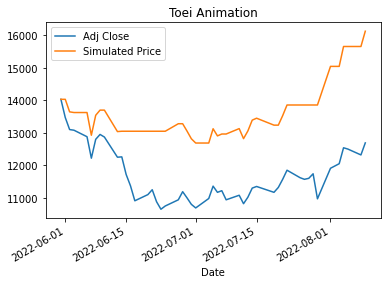

In [26]:
df = pd.read_csv('./4816.T.csv')
processed = proccessData(df)
runAnalysis(processed, "Toei Animation")

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/3067418901.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True, how='any')
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/3067418901.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/3067418901.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols[i]+"+"+cols[j]] = -(df[cols[i]] * df[cols[j]])
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["-"+cols[i]] = -df[cols[i]]
/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_95715/1443834177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

Train, Val, Test split
688 450 50
DMN_14 0.42
PPOh_12_26_9 0.42
RVGI_14_4 0.44
AO_5_34+BIAS_SMA_26 0.42
AO_5_34+BR_26 0.42
AO_5_34+KST_10_15_20_30_10_10_10_15 0.44
AO_5_34+MACDs_12_26_9 0.42
AO_5_34+PPO_12_26_9 0.44
AO_5_34+QQE_14_5_4.236_RSIMA 0.42
AO_5_34+SMI_5_20_5 0.42
AO_5_34+SMIs_5_20_5 0.42
APO_12_26+CFO_9 0.42
APO_12_26+DMN_14 0.42
BIAS_SMA_26+BR_26 0.42
BIAS_SMA_26+CFO_9 0.42
BIAS_SMA_26+DMN_14 0.42
BIAS_SMA_26+FISHERT_9_1 0.42
BIAS_SMA_26+SMI_5_20_5 0.42
BOP+ER_10 0.42
BOP+PPOs_12_26_9 0.42
BOP+PVOs_12_26_9 0.42
BOP+SQZPRO_OFF 0.44
AR_26+PVOs_12_26_9 0.42
AR_26+SLOPE_1 0.42
AR_26+SQZPRO_ON_NARROW 0.44
AR_26+TRIX_30_9 0.44
BR_26+ROC_10 0.42
CCI_14_0.015+SQZPRO_ON_WIDE 0.42
CFO_9+INERTIA_20_14 0.44
CFO_9+QQE_14_5_4.236_RSIMA 0.42
CFO_9+RVGIs_14_4 0.44
CFO_9+TRIX_30_9 0.44
CFO_9+TRIXs_30_9 0.44
CG_10+DMN_14 0.42
CG_10+PPOh_12_26_9 0.42
CG_10+RVGI_14_4 0.44
CMO_14+MACD_12_26_9 0.44
CMO_14+PPOs_12_26_9 0.42
CMO_14+RSX_14 0.44
CMO_14+STCmacd_10_12_26_0.5 0.44
CMO_14+STOCHRSId_14_14

-RSX_14+SQZ_NO 0.42
-RSX_14+SQZPRO_NO 0.42
-RVGI_14_4+SQZ_OFF 0.42
-RVGI_14_4+SQZPRO_ON_WIDE 0.42
-STCmacd_10_12_26_0.5+TSIs_13_25_13 0.42
-SLOPE_1+STOCHRSId_14_14_3_3 0.42
-SMIs_5_20_5+SQZPRO_OFF 0.42
-SQZ_20_2.0_20_1.5+SQZ_ON 0.42
-SQZ_20_2.0_20_1.5+SQZ_NO 0.42
-SQZ_20_2.0_20_1.5+SQZPRO_ON_NORMAL 0.42
-SQZ_20_2.0_20_1.5+SQZPRO_ON_NARROW 0.42
-SQZ_20_2.0_20_1.5+SQZPRO_NO 0.42
-SQZ_ON+SQZPRO_20_2.0_20_2_1.5_1 0.42
-SQZ_ON+STOCHRSId_14_14_3_3 0.44
-SQZ_NO+SQZPRO_20_2.0_20_2_1.5_1 0.42
-SQZ_NO+STOCHk_14_3_3 0.42
-SQZ_NO+TSI_13_25_13 0.44
-SQZ_NO+UO_7_14_28 0.46
-SQZPRO_20_2.0_20_2_1.5_1+SQZPRO_ON_NORMAL 0.42
-SQZPRO_20_2.0_20_2_1.5_1+SQZPRO_ON_NARROW 0.42
-SQZPRO_20_2.0_20_2_1.5_1+SQZPRO_NO 0.42
-SQZPRO_ON_NORMAL+STOCHRSId_14_14_3_3 0.44
-SQZPRO_ON_NARROW+UO_7_14_28 0.44
-SQZPRO_NO+STOCHk_14_3_3 0.42
-SQZPRO_NO+TSI_13_25_13 0.44
-SQZPRO_NO+UO_7_14_28 0.46
-TRIX_30_9+TSIs_13_25_13 0.46
-TRIXs_30_9+TSIs_13_25_13 0.46
-TSI_13_25_13+TSIs_13_25_13 0.42
[(0.48, 'FISHERT_9_1+PPO_12_26_9'), (0.4

Best so far 0.5523385300668151 array([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5545657015590201 array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5590200445434298 array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5605381165919282 array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5657015590200446 array([0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5746102449888641 array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Done
Combining momentum predictions from ['PPO_12_26_9+TSIs_13_25_13', '-UO_7_14_28', '-TRIX_30_9+TSIs_13_25_13']
Test Accur

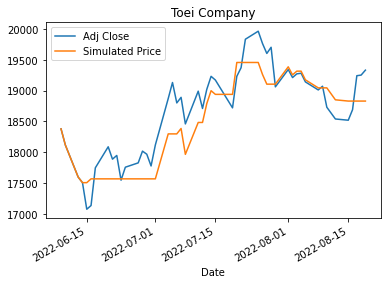

In [16]:
df = pd.read_csv('./9605.T.csv')
processed = proccessData(df)
runAnalysis(processed, "Toei Company")

C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True, how='any')
C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Train, Val, Test split
999 450 50
Cols 25
Best so far 0.49665924276169265 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5033557046979866 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5300668151447662 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.532293986636971 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5434298440979956 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0.])
Best so far 0.5458612975391499 array([0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5525727069351231 array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 

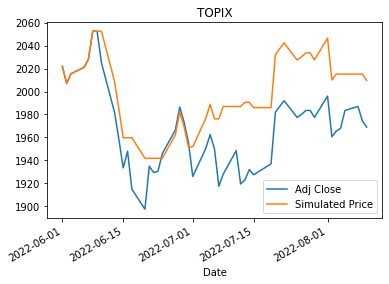

In [31]:
df = pd.read_csv('./1308.T.csv')
processed = proccessData(df)
runAnalysis(processed, 'TOPIX')

C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True, how='any')
C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Train, Val, Test split
999 450 50
Cols 25
Best so far 0.5456570155902004 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5567928730512249 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5612472160356348 array([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5701559020044543 array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0.])
Best so far 0.5723830734966593 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0.])
Best so far 0.576837416481069 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0.])
Done
Combining momentum predictions from ['BR_26+RVGIs_14_4', '-AO_5_34+J_9_3', '-K

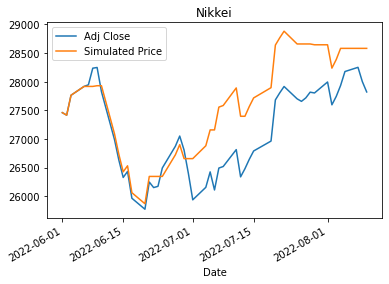

In [32]:
df = pd.read_csv('./^N225.csv')
processed = proccessData(df)
runAnalysis(processed, 'Nikkei')

C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True, how='any')
C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Train, Val, Test split
707 450 50
Cols 25
Best so far 0.5278396436525612 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.532293986636971 array([1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5412026726057907 array([1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5456570155902004 array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1.])
Best so far 0.5590200445434298 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1.])
Done
Combining momentum predictions from ['-COPC_11_14_10+MACDh_12_26_9', '-MACDs_12_26_9+SMIs_5_20_5', '-FISHERT_9_1+TSI_13_25_13']
Test Accuracy: 0.4489795918367347
[ 1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  

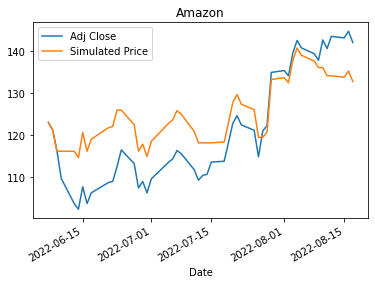

In [33]:
df = pd.read_csv('./AMZN.csv')
processed = proccessData(df)
runAnalysis(processed, 'Amazon')

C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True, how='any')
C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Train, Val, Test split
707 450 50
Cols 25
Best so far 0.5011135857461024 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5367483296213809 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5501113585746102 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Done
Combining momentum predictions from ['-SMIo_5_20_5+TSI_13_25_13']
Test Accuracy: 0.5510204081632653
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Trades Made 0


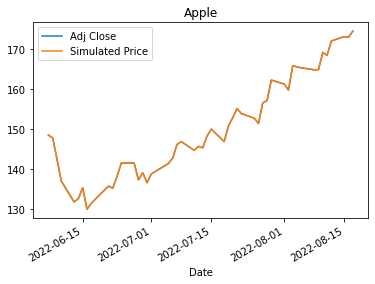

In [34]:
df = pd.read_csv('./AAPL.csv')
processed = proccessData(df)
runAnalysis(processed, 'Apple')

C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True, how='any')
C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Train, Val, Test split
707 450 50
Cols 25
Best so far 0.5167037861915368 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5545657015590201 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0.])
Done
Combining momentum predictions from ['-SMIo_5_20_5+TSI_13_25_13']
Test Accuracy: 0.5102040816326531
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.
 -1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Trades Made 8


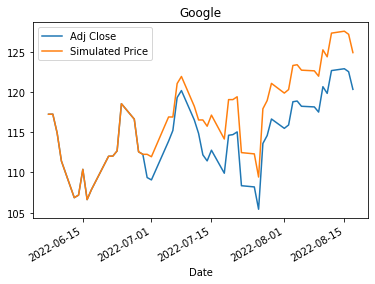

In [35]:
df = pd.read_csv('./GOOG.csv')
processed = proccessData(df)
runAnalysis(processed, 'Google')

C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True, how='any')
C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Train, Val, Test split
707 450 50
Cols 25
Best so far 0.5634743875278396 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.576837416481069 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0.])
Best so far 0.579064587973274 array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0.])
Best so far 0.5835189309576837 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0.])
Done
Combining momentum predictions from ['-PVOs_12_26_9+RSX_14', '-J_9_3+PPOs_12_26_9', '-PVOs_12_26_9+SQZ_20_2.0_20_1.5']
Test Accuracy: 0.6122448979591837
[ 1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1.
 -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.
 -1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1.]
Trades Made 14

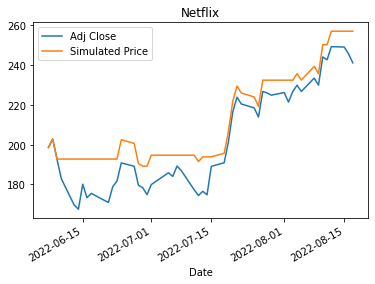

In [36]:
df = pd.read_csv('./NFLX.csv')
processed = proccessData(df)
runAnalysis(processed, 'Netflix')

C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True, how='any')
C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\anjur\AppData\Local\Temp\ipykernel_43636\3067418901.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Train, Val, Test split
707 450 50
Cols 25
Best so far 0.49443207126948774 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.512249443207127 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5478841870824054 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5501113585746102 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5590200445434298 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5723830734966593 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Best so far 0.5746102449888641 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 

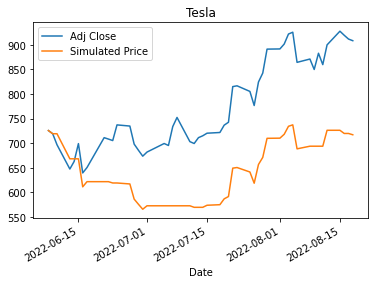

In [37]:
df = pd.read_csv('./TSLA.csv')
processed = proccessData(df)
runAnalysis(processed, 'Tesla')